# Errors in numerical analysis - corrections - Lecture no-1, ex-1 , teacher info : prof..... 

## Preamble: Notebook Shortcuts

* Esc + m: Markdown
* Esc + y: code
* Esc + a: cell above
* Esc + b: cell below
* CTRL + Enter: execute current cell
* Esc + m: Markdown
* Esc + y: code
* Esc + a: cell above
* Esc + b: cell below
* CTRL + Enter: execute current cell
* CTRL + Shift + minus: split cell

## Documentation

* matplotlib: https://matplotlib.org/stable/gallery/subplots_axes_and_figures/index.html
* numpy: https://numpy.org/doc/



## Exercise 1: absolute and relative errors 


Print the relative and absolute errors of the Stirling approximation

$$ n! \approx \sqrt{2\pi n} \left( \frac{n}{e} \right)^n  $$

Do again the comparison with a few terms of the asymptotic development, and then comment on the accuracy of the approximation.


(0.0010371338656423035, 0.0005185669328211517) 2.0
(0.0041128851714304915, 0.0001713702154762705) 24.0
(1.9545947114456794, 4.847705137514086e-05) 40320.0
(268626864.24609375, 1.2838960085345084e-05) 20922789888000.0
(8.683880054599206e+29, 3.3002137475766327e-06) 2.6313083693369355e+35
(1.0612561208170772e+83, 8.363793674689687e-07) 1.2688693218588415e+89
(8.117740631773364e+208, 2.1051113732440803e-07) 3.856204823625805e+215


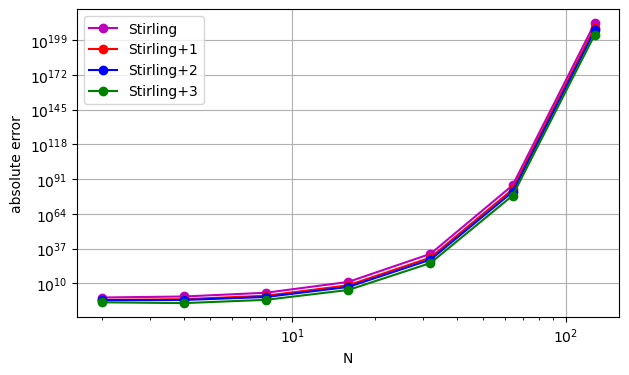

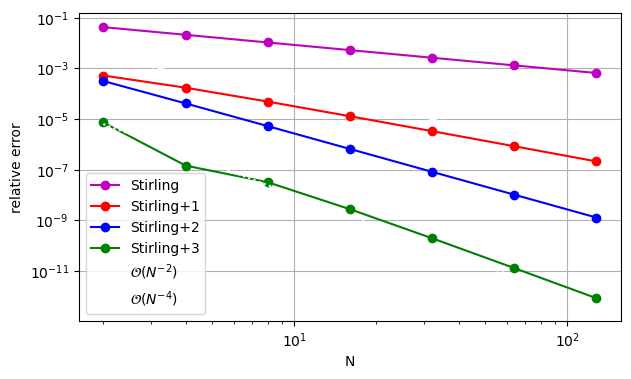

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import factorial
#plt.style.use('dark_background')
plt.style.use('default')

def Stirling3(n):
  return np.sqrt(2*np.pi*n)*(n/np.e)**n * (1 + 1/(12*n) + 1/(288*n**2) - 139/(51840*n**3))

def Stirling2(n):
  return np.sqrt(2*np.pi*n)*(n/np.e)**n * (1 + 1/(12*n) + 1/(288*n**2) )

def Stirling1(n):
  return np.sqrt(2*np.pi*n)*(n/np.e)**n * (1 + 1/(12*n) )

def Stirling(n):
  return np.sqrt(2*np.pi*n)*(n/np.e)**n

def Errors(x_ex, xref):
    abs_err = np.abs(x_ex - xref)
    rel_err = np.abs((x_ex - xref)/xref)
    return abs_err, rel_err

N = np.array([2,4,8,16,32,64,128]).astype(float)


for n in N:
    print ( Errors(Stirling1(n), factorial(n)), factorial(n) )

err0 = Errors(factorial(N), Stirling(N))[0]
err1 = Errors(factorial(N), Stirling1(N))[0]
err2 = Errors(factorial(N), Stirling2(N))[0]
err3 = Errors(factorial(N), Stirling3(N))[0]

plt.figure(figsize=(7,4))
plt.plot(N, err0, 'm-o', label = 'Stirling')
plt.plot(N, err1, 'r-o', label = 'Stirling+1')
plt.plot(N, err2, 'b-o', label = 'Stirling+2')
plt.plot(N, err3, 'g-o', label = 'Stirling+3')
plt.yscale('log'); plt.xscale('log')
plt.xlabel('N')
plt.ylabel('absolute error')
plt.legend()
plt.grid()

err0 = Errors(factorial(N), Stirling(N))[1]
err1 = Errors(factorial(N), Stirling1(N))[1]
err2 = Errors(factorial(N), Stirling2(N))[1]
err3 = Errors(factorial(N), Stirling3(N))[1]

plt.figure(figsize=(7,4))
plt.loglog(N, err0, 'm-o', label = 'Stirling')
plt.loglog(N, err1, 'r-o', label = 'Stirling+1')
plt.loglog(N, err2, 'b-o', label = 'Stirling+2')
plt.loglog(N, err3, 'g-o', label = 'Stirling+3')
plt.loglog(N, 0.01*N**(-2),'w--', label="$\mathcal{O}(N^{-2})$")
plt.loglog(N, 0.0001*N**(-4),'w:', label="$\mathcal{O}(N^{-4})$")
plt.xlabel('N')
plt.ylabel('relative error')
plt.legend()
plt.grid()




## Exercise 2:  Round off vs discretization error
Let $ f(x) = \sin(x) $ and $ x_0 = 1.2 $.

### 2.1. Taylor Expansion and Derivation of Finite Difference Approximation

The Taylor expansion of $f$ around $x_0$ is:

$$
f(x) = f(x_0) + f'(x_0)(x - x_0) + \frac{f''(x_0)}{2!}(x - x_0)^2 + \dots
$$

Using a forward difference scheme, the first-order approximation of $ f'(x_0) $ is:

$$
f'(x_0) \approx \frac{f(x_0 + h) - f(x_0)}{h}
$$

The absolute error of this approximation can be expressed as:

$$
\text{Error}(h) = \left| \frac{f(x_0 + h) - f(x_0)}{h} - \cos(1.2) \right|
$$

### 2.2. Plot the Absolute Error in Log-Log Scale

The plot of the absolute error as a function of the step size $h$, where $h \in [10^{-16}, 1]$, should be done using a log-log scale.

### 2.3. Effect of Floating Point Precision

To explore the effect of floating-point precision, repeat the error calculation using single precision (`np.float32`) and plot the results. The discretization error should decrease as $ h $ decreases, but when $ h $ is too small, round-off errors due to limited precision dominate, and the error starts increasing.



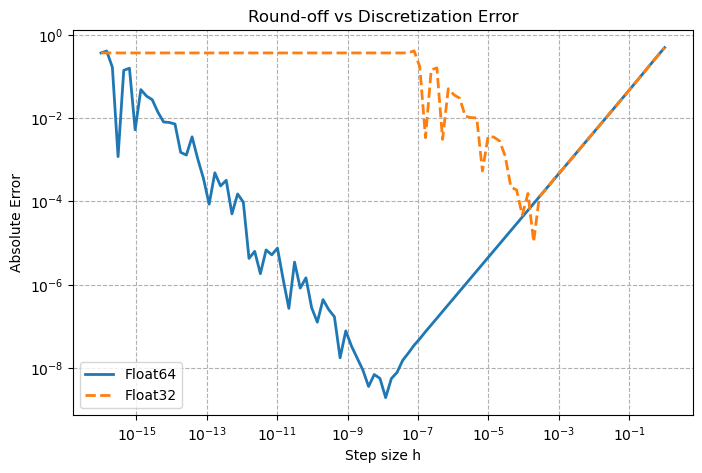

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define f(x) = sin(x) and its exact derivative f'(x) = cos(x)
f = np.sin
f_prime_exact = np.cos
x0 = 1.2

# Range of h values
h_values = np.logspace(-16, 0, 100)

# Errors using double precision
errors_float64 = np.abs((f(x0 + h_values) - f(x0)) / h_values - f_prime_exact(x0))

# Errors using single precision
x0_float32 = np.float32(x0)
h_values_float32 = np.float32(h_values)
errors_float32 = np.abs((f(x0_float32 + h_values_float32) - f(x0_float32)) / h_values_float32 - f_prime_exact(x0_float32))

# Plot
plt.figure(figsize=(8, 5))
plt.loglog(h_values, errors_float64, '-', label='Float64', linewidth=2)
plt.loglog(h_values, errors_float32, '--',label='Float32', linewidth=2)
plt.xlabel('Step size h')
plt.ylabel('Absolute Error')
plt.title('Round-off vs Discretization Error')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()

#plt.savefig("exercise_2_round_off_vs_discretization_error.png")


## Exercise 3. Decimal approximations



In [4]:
import numpy as np

# tip use f-strings for easily printing values
# https://www.geeksforgeeks.org/formatted-string-literals-f-strings-python/
    
def print_decimal(number):
    # Single precision (32-bit)
    single_precision = np.float32(number)
    print(f'\nSingle Precision (32-bit): {single_precision:.20f}')

    # Double precision (64-bit)
    double_precision = np.float64(number)
    print(f'Double Precision (64-bit): {double_precision:.20f}')
    return

# Define the decimal number
print_decimal(0.1)
print_decimal(0.25)
print_decimal(0.35)


Single Precision (32-bit): 0.10000000149011611938
Double Precision (64-bit): 0.10000000000000000555

Single Precision (32-bit): 0.25000000000000000000
Double Precision (64-bit): 0.25000000000000000000

Single Precision (32-bit): 0.34999999403953552246
Double Precision (64-bit): 0.34999999999999997780



## Exercise 4: Decimal Conversion of a Single-Precision Floating Point Number 

Find the decimal equivalent of the following 32-bit precision machine number (sign, exponent, significand):

Assume the 32-bit binary number is:  
$$ 0 \ 10000000 \ 10010010000111111011011 $$

1. **Sign (s)**:  
   The sign bit is the first bit. In this case, it is \( 0 \), which means the number is positive.

2. **Exponent (e)**:  
   The next 8 bits represent the exponent:  
   $$ 10000000_2 = 128_{10} $$  
   To get the actual exponent, we subtract the bias for single precision (which is \( 127 \)):  
   $$ e = 128 - 127 = 1 $$

3. **Significand (Mantissa)**:  
   The remaining 23 bits represent the significand (or mantissa). The binary value is:  
   $$ 1.10010010000111111011011_2 $$  
   In decimal, this is:  
   $ 1 + 2^{-1} + 2^{-4} + 2^{-7} + 2^{-12} + 2^{-13} + 2^{-14} + 2^{-15} + 2^{-16} + 2^{-17} + 2^{-19} + 2^{-20} + 2^{-22} + 2^{-23} = 1.570796370506287 $

4. **Final Decimal Value**:  
   Now we use the formula for the floating-point number:  
   $$ (-1)^s \times 2^e \times \text{Significand} $$  
   Substituting the values we found:  
   $$ (-1)^0 \times 2^1 \times 1.5707963705062866 $$  
   $$ = 2 \times 1.5707963705062866 $$  
   $$ \approx 3.14159274 $$

This is an approximation of $\pi$ in single precision, which slightly differs from the true value of $\pi$ due to the limited precision of 32-bit floating-point representation.

## Exercise 5 - polynomials


Evaluate and plot the polynomial function $(1 − x)^6$ written in its factored and developed forms. Look in 
particular at the behaviour close to the root $x = 1$. You can use the interval $I = [0.995, 1.005]$ equally 
spaced by 100 points. Explain your observations.

Setp 1 - obtained the developed form

In [5]:
import sympy as sp

# Define the symbolic variable
x_sym = sp.symbols('x')
factored_expr = (1 - x_sym)**6
developed_expr = sp.expand(factored_expr)
print(developed_expr)

x**6 - 6*x**5 + 15*x**4 - 20*x**3 + 15*x**2 - 6*x + 1


Step 2 - print the factored and developed form

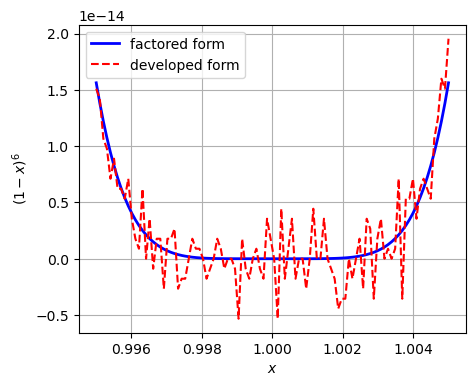

In [6]:
def factored_form(x):
    return (1-x)**6

def developed_form(x):
    return x**6 - 6*x**5 + 15*x**4 - 20*x**3 + 15*x**2 - 6*x + 1 

x = np.linspace(0.995,1.005,100)
plt.figure(figsize=(5,4))
plt.plot(x,factored_form(x),'b-',label='factored form',linewidth=2)
plt.plot(x,developed_form(x),'r--',label='developed form')
plt.legend()
plt.xlabel('$x$'); plt.ylabel('$(1-x)^6$')
plt.grid()
plt.show()


Both forms show a sharp drop to zero, as this is the root of the polynomial. However, small differences between the factored and developed forms appear, which result from the loss of precision in evaluating the developed polynomial due to subtractive cancellation near the root.In summary, the factored form is numerically more stable near $x=1$, while the developed form shows some small deviations due to rounding errors, especially near the root.

## Exercise 6 - catastrophic cancellation
Recall the quadratic formula to find the root of $a x^2 + b x + c$. Find an alternative formula to avoid the 
cancellation effect. Test both formula for the coefficients $a = 1$, $b = −(10^8 + 10^{−8})$, $c = 1$. Explain what is 
going on, and propose a method to compute both roots accurately.

In [7]:
def quadratic(a, b, c, x):
    return a*x**2 + b*x + c

def quadratic_roots(a, b, c):
    det = np.sqrt(b*b - 4*a*c)
    print(f'det = {det:.20f} is positive --> 2 real roots')
    x1 = (-b - det) / (2*a)
    x2 = (-b + det) / (2*a)
    return x1, x2

def quadratic_roots2(a, b, c):
	det = np.sqrt(b*b - 4*a*c)
	x1 = (2*c) / (-b + det)
	x2 = (-b + det) / (2*a)
	return x1, x2  

a = 1
b = -(10**8 + 10**(-8))
c = 1

r1, r2 = quadratic_roots(a,b,c)
print("quadratic formula: root 1 = %s" %r1, "root 2 = %s" %r2)

r3, r4 = quadratic_roots2(a,b,c)
print("alternate quadratic formula: root 1 = %s" %r3, "root 2 = %s" %r4)

print(f'\nReinjecting root1 into original equation = {quadratic(a, b, c, r1)} (is not zero...)')
print(f'Reinjecting root2 into original equation = {quadratic(a, b, c, r2)}')
print(f'Reinjecting root1* into original equation = {quadratic(a, b, c, r3)} (is much better...)')
print(f'Reinjecting root2* into original equation = {quadratic(a, b, c, r4)} (is still not quite zero...)')

det = 99999999.99999998509883880615 is positive --> 2 real roots
quadratic formula: root 1 = 1.4901161193847656e-08 root 2 = 100000000.0
alternate quadratic formula: root 1 = 1e-08 root 2 = 100000000.0

Reinjecting root1 into original equation = -0.4901161193847656 (is not zero...)
Reinjecting root2 into original equation = -1.0
Reinjecting root1* into original equation = -2.220446049250313e-16 (is much better...)
Reinjecting root2* into original equation = -1.0 (is still not quite zero...)


When $b^2$ is much larger than $4ac$ and b is negative, the term inside the square root is very close to $|b|$. For the first root, we end up subtracting nearly equal numbers, called catastrophic cancellation. It occurs when the result of the subtraction between two numbers that are close in value results in a significant loss of precision.

The trick is to multiply by the conjugate. On the numerator we get:

$$
(-b - \sqrt{b^2 - 4ac})(-b + \sqrt{b^2 - 4ac}) = b^2 - (\sqrt{b^2 - 4ac})^2 = b^2 - (b^2 - 4ac) = 4ac
$$

Such that the alternative final formula for the first root reads:

$$
\frac{2c}{-b + \sqrt{b^2 - 4ac}}
$$

Note that we still do not get a good absolute error of the second root, although the relative error is good.